# <span style="color: #e67e22; font-family: 'Georgia', serif;">**Car Sales Data Analysis**</span>

In this project, we’ll dive into a comprehensive analysis of **car sales data**. Using powerful Python libraries like <span style="color: #e74c3c; font-weight: bold;">`pandas`</span>, <span style="color: #8e44ad; font-weight: bold;">`matplotlib`</span>, and <span style="color: #27ae60; font-weight: bold;">`seaborn`</span>, we’ll explore trends, patterns, and insights to better understand the automotive market. Let’s hit the road! 🛣️

## <span style="color: #3498db; font-family: 'Georgia', serif;">**Introduction**</span>

This report explores the **trends and insights** behind car sales, analyzing key factors like:  
- <span style="color: #3498db;">**Price**</span> 💰  
- <span style="color: #e74c3c;">**Horsepower**</span> 🐎  
- <span style="color: #27ae60;">**Fuel Efficiency**</span> ⛽  
- <span style="color: #8e44ad;">**Drive Modes**</span> 🚙  

By breaking down the data, we uncover what influences car pricing, how different features impact value, and what buyers should consider when making a purchase. Whether you’re looking for **affordability**, **performance**, or **efficiency**, this analysis provides actionable insights to help make informed decisions in the car market.  

---

## <span style="color: #3498db; font-family: 'Georgia', serif;">**Objective**</span>

The goal of this **exploratory data analysis (EDA)** is to analyze a car sales dataset to uncover:  
- **Patterns** and **trends** in car specifications  
- Insights into **fuel efficiency** and **pricing**  
- Key factors that influence buyer decisions  

Let’s dive into the data and uncover what drives the car market! 🚀

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown
import numpy as np

sns.set(color_codes=True)

## <span style="color: #3498db; font-family: 'Georgia', serif;">**Prepare Data**</span>

### <span style="font-family: 'Georgia', serif;">**Understanding the Car Sales Data Cleaning Process**</span>

In this section, we’ll walk through the steps we’re taking to clean and prepare the car sales data for analysis. Don’t worry if you’re not a technical person—we’ll break it down in simple terms!

---

##### **How?**
We’re using a special tool that we created (a Python class called `CarSalesDataWrangler` in the `car_sales_wrangler.py`) to clean up a dataset about car sales. This dataset contains information like car prices, horsepower, fuel efficiency, and more. However, raw data often has issues like missing values, duplicates, or unnecessary information. Our goal is to clean it up so we can analyze it effectively.

---

In [15]:
# Import the class
from car_sales_wrangler import CarSalesDataWrangler

# Initialize the wrangler with your dataset
wrangler = CarSalesDataWrangler("data.csv")

# Call the wrangle method to clean and preprocess the data
df = wrangler.wrangle()
print(f'Dataset: {df.shape[0]} rows and {df.shape[1]} columns')
print(f'Dataset size: {df.size} ')
df.head()

Dataset: 8286 rows and 16 columns
Dataset size: 132576 


,make,model,year,hp,cylinders,transmission,drive_mode,mpg_h,mpg_c,price,car_age,mpg,price_segment,age_segment,hp_segment,fuel_segment
0,BMW,Others,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135000,14,22.5,Premium,Used,Performance,Average
1,BMW,Others,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650000,14,23.5,Premium,Used,Performance,Average
2,BMW,Others,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350000,14,24.0,Premium,Used,Performance,Average
3,BMW,Others,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450000,14,23.0,Mid-Range,Used,Standard,Average
4,BMW,Others,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500000,14,23.0,Premium,Used,Standard,Average


### <span style="color: #3498db; font-family: 'Georgia', serif;">**Explore Data**</span>

### **Columns in the Dataset:**
This is the list of cleaned and preprocessed columns in the dataset. Each column represents a specific feature of the cars, such as:  
- **`make`**: The brand of the car (e.g., Toyota, Ford).  
- **`model`**: The specific model of the car.  
- **`year`**: The year the car was made.  
- **`hp`**: Horsepower (how powerful the engine is).  
- **`price`**: The price of the car.  
- **`mpg`**: Average fuel efficiency (miles per gallon).  
- **Segments**: Categories like `price_segment`, `age_segment`, `hp_segment`, and `fuel_segment` help group cars based on price, age, power, and fuel efficiency.  

These columns are now clean and ready for analysis! 🚗✨

In [18]:
is_null = df.isnull().sum().sum()
# Create the Markdown text with the dynamic value
markdown_text = f"""
### **Null Values Check:**
We checked the dataset for missing values, and the result is **{is_null}**.  
This means there are **{'no missing values' if is_null == 0 else 'missing values'}** in the dataset.  
"""

# Display the Markdown
Markdown(markdown_text)


### **Null Values Check:**
We checked the dataset for missing values, and the result is **0**.  
This means there are **no missing values** in the dataset.  


### **`df.info()`**
We will have a **quick summary** of the dataset. It includes:  
- The **number of rows and columns** in the dataset.  
- The **names of all columns** and their **data types** (e.g., `int64`, `float64`, `object`).  
- The **number of non-null values** in each column (to check for missing data).  
- The **memory usage** of the dataset.  

This is a useful way to get an overview of the dataset’s structure and identify potential issues like missing values or incorrect data types.  

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8286 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   make           8286 non-null   object 
 1   model          8286 non-null   object 
 2   year           8286 non-null   int64  
 3   hp             8286 non-null   float64
 4   cylinders      8286 non-null   float64
 5   transmission   8286 non-null   object 
 6   drive_mode     8286 non-null   object 
 7   mpg_h          8286 non-null   int64  
 8   mpg_c          8286 non-null   int64  
 9   price          8286 non-null   int32  
 10  car_age        8286 non-null   int64  
 11  mpg            8286 non-null   float64
 12  price_segment  8286 non-null   object 
 13  age_segment    8286 non-null   object 
 14  hp_segment     8286 non-null   object 
 15  fuel_segment   8286 non-null   object 
dtypes: float64(3), int32(1), int64(4), object(8)
memory usage: 1.0+ MB


### **`df.describe()`**
We will also have a **statistical summary** of the numerical columns in the dataset. It includes:  
- **Count**: The number of non-null values.  
- **Mean**: The average value.  
- **Std**: The standard deviation (how spread out the values are).  
- **Min**: The smallest value.  
- **25%**: The 25th percentile (25% of values are below this).  
- **50%**: The median (50% of values are below this).  
- **75%**: The 75th percentile (75% of values are below this).  
- **Max**: The largest value.  

This summary helps us understand the distribution and range of numerical data, such as car prices, horsepower, or fuel efficiency.  

#### **Outlier Detection:**
We’re using the **IQR (Interquartile Range) score technique** to detect and remove outliers. Outliers are data points that lie far outside the typical range of values and can skew our analysis.  

In a box plot, outliers are represented as points outside the "whiskers" of the plot. For our car sales dataset:  
- Outliers in the `year` column are cars from **1995 or earlier**.  
- These older cars may not contribute meaningful insights to our analysis, so it’s reasonable to drop them.  

This method is based on the [Khan Academy lesson on IQR](https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/identifying-outliers-iqr-rule).  

---

#### **Box Plots:**
Even after cleaning the dataset using the IQR method, some outliers remain in features like **horsepower (hp)**, **price**, and **city MPG (mpg_c)**. In the box plots below, the points outside the boxes represent these outliers.  

While outliers can sometimes provide valuable insights, they may also skew our analysis. We’ll carefully evaluate whether to keep or remove them based on their impact on the results.    

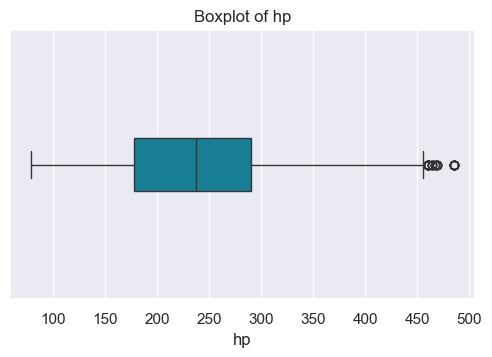

In [150]:
# Get numeric columns
nums_cols = df.select_dtypes('number').columns.to_list()

# Loop through columns and plot only if column is 'hp'
for i in nums_cols:
    if i == 'hp':  # change to exact match with '=='
        plt.figure(figsize=(6, 3.5))
        sns.boxplot(x=df[i], color='#048BA8', width = 0.2)
        plt.title(f'Boxplot of {i}')
        plt.show()

In [152]:
# (df['price'].describe()).apply(lambda x: f"{x:,.2f}")

### Insights from the Correlation Heatmap
1. **Price and Car Age**:
   - The correlation coefficient between price and car age is -0.53, indicating a moderate negative correlation. This suggests that as the car age increases, the price tends to decrease.
   - This relationship is crucial for understanding depreciation trends. Older cars generally have lower prices, which is important for pricing strategies and resale value predictions.
2. **Price and MPG_C**:
   - There is a strong positive correlation (0.98) between price and city MPG, suggesting that more expensive cars tend to have better city fuel efficiency.
3. **Cylinders and MPG**:
   - A strong negative correlation (-0.76) indicates that cars with more cylinders tend to have lower fuel efficiency.
4. **HP and MPG**:
   - A moderate negative correlation (-0.56) suggests that higher horsepower is associated with lower fuel efficiency.
5. **Price and HP**:
   - A moderate positive correlation (0.73) indicates that more expensive cars tend to have higher horsepower.

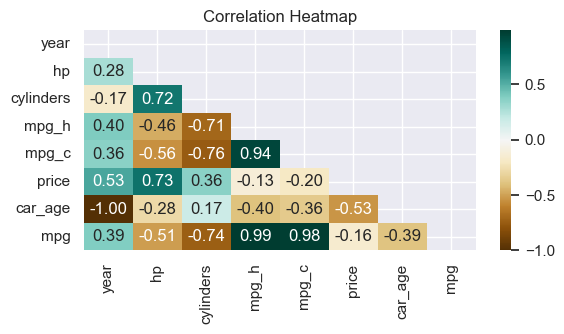

In [157]:
corr = df[nums_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(6, 3.5))

sns.heatmap(
    corr,
    mask = mask,
    annot=True,       
    cmap="BrBG",         
    fmt=".2f",            
    square=False,      
    cbar=True            
)

plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [159]:
corr['price'].sort_values(key = abs).tail()

cylinders    0.362601
car_age     -0.533933
year         0.533933
hp           0.734775
price        1.000000
Name: price, dtype: float64

## <span style="color: #3498db; font-family: 'Georgia', serif;">**Key Insights**</span>

### <span style="color: #3498db; font-family: 'Georgia', serif;">**1. Distribution**</span>

#### <span style="color: #D90368; font-family: 'Georgia', serif;">**i. Distribution of Car Makes**</span>
- **For car buyers:** Chevrolet, Ford, and Toyota offer wider availability, strong resale values, and easier access to service and parts, making them practical choices.

- **For car manufacturers:** The dominance of these top brands suggests a highly competitive market where differentiation through technology, design, and fuel efficiency is key to gaining market share.

- **For dealerships and service providers:** With a large number of Chevrolet and Ford vehicles on the road, businesses can focus on these brands to ensure high customer traffic and parts inventory optimization.

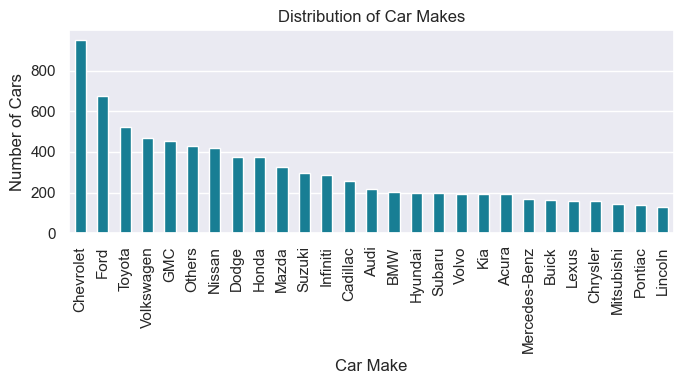

In [166]:
# Get value counts and reset index
make_counts = df['make'].value_counts().reset_index()
make_counts.columns = ['Car Make', 'Number of Cars']

plt.figure(figsize=(7, 4))
sns.barplot(
    data=make_counts,
    x='Car Make',
    y='Number of Cars',
    color='#048BA8',
    width = 0.5
)

plt.title('Distribution of Car Makes')
plt.xlabel('Car Make')
plt.ylabel('Number of Cars')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### <span style="color: #D90368; font-family: 'Georgia', serif;">**ii. Price Distribution**</span>
- **For car buyers:** The majority of vehicles fall in the UGX 20M–40M range, suggesting this is the most common budget segment. Buyers looking for affordability will find many options in this range, while those seeking premium models should expect significantly higher prices.

- **For car dealerships:** The high concentration of mid-priced cars indicates a strong market for used and mid-range new vehicles. Dealers should stock vehicles in this price bracket to match demand while offering financing options for higher-end models.

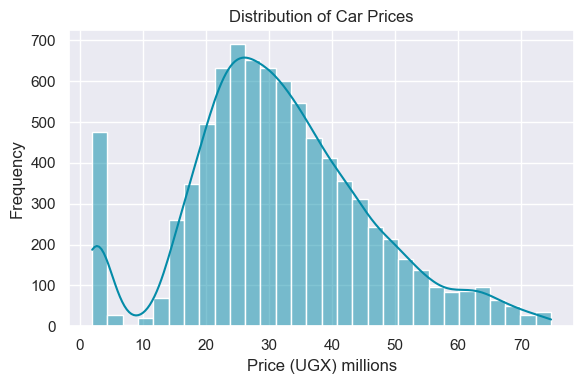

In [171]:
plt.figure(figsize=(6, 4))

sns.histplot(
    x=df['price'] / 1e6,   # scale to millions
    bins=30,               
    kde=True,             # you can set this to False if you don't want a density curve
    color='#048BA8'
)

plt.title('Distribution of Car Prices')
plt.xlabel('Price (UGX) millions')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### <span style="color: #D90368; font-family: 'Georgia', serif;">**iii. Price Segment Distribution**</span>
- **For car buyers:** The majority of vehicles fall within the Mid-Range and Premium segments, suggesting most buyers are aiming for a balance between affordability and higher-end features.

- **For car dealerships:** The concentration of cars in Mid-Range and Premium categories signals strong demand; dealers should prioritize inventory and marketing for these segments while exploring niche opportunities in Luxury and Budget.


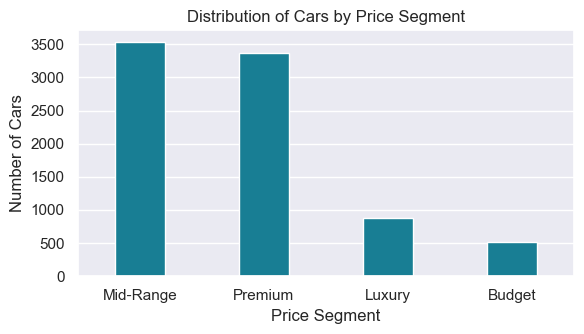

In [176]:
# Get counts for price segments
seg_counts = df['price_segment'].value_counts().reset_index()
seg_counts.columns = ['Price Segment', 'Number of Cars']

plt.figure(figsize=(6, 3.5))
sns.barplot(
    data=seg_counts,
    x='Price Segment',
    y='Number of Cars',
    color='#048BA8',
    width = 0.4
)

plt.title('Distribution of Cars by Price Segment')
plt.xlabel('Price Segment')
plt.ylabel('Number of Cars')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### <span style="color: #D90368; font-family: 'Georgia', serif;">**iv. Fuel Segment Distribution**</span>
- **For car buyers:** The majority of available cars fall into the "Average" fuel efficiency segment (40.4%), meaning most vehicles balance power and efficiency. Fuel-efficient cars (29.7%) cater to budget-conscious and eco-friendly drivers, while Gas guzzlers (29.9%) offer high performance at the cost of increased fuel consumption.
- **For car manufacturers & dealerships:** Since 40.4% of cars are in the "Average" category, this segment appeals to the broadest consumer base. However, the Gas guzzler market is nearly as large as the Efficient market, indicating strong demand for both power and fuel economy. Dealers should tailor marketing strategies to capture these distinct customer preferences.

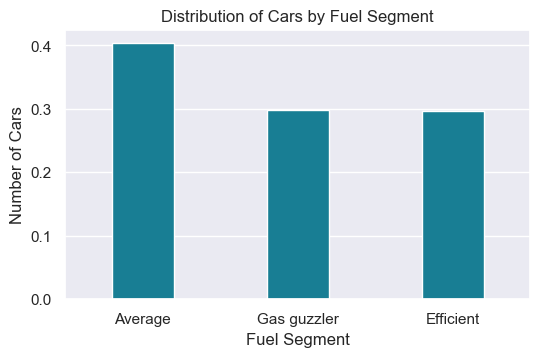

In [183]:
fuel_counts = df['fuel_segment'].value_counts(normalize=True).reset_index()
fuel_counts.columns = ['Fuel Segment', 'Number of Cars']

plt.figure(figsize=(6, 3.5))  # Set figure size to (10, 4)
sns.barplot(
    x='Fuel Segment', 
    y='Number of Cars', 
    data=fuel_counts,
    width = 0.4,
    color='#048BA8'  # Use a single color for all bars
)
plt.title('Distribution of Cars by Fuel Segment')
plt.xlabel('Fuel Segment')
plt.ylabel('Number of Cars')
plt.xticks(rotation=0)  # Rotate x-axis labels
plt.show()

### <span style="color: #3498db; font-family: 'Georgia', serif;">**2. Price and Common Features**</span>

#### <span style="color: #D90368; font-family: 'Georgia', serif;">**i. Price by Age Segment**</span>
- **For car buyers:** Prices tend to be highest for New and Fairly New cars, while Old cars are significantly cheaper but may come with higher maintenance costs.

- **For car dealerships:** New and Fairly New vehicles maintain higher price points, suggesting stronger margins; dealers should balance inventory across all age segments to cater to both budget-conscious and premium-focused customers.


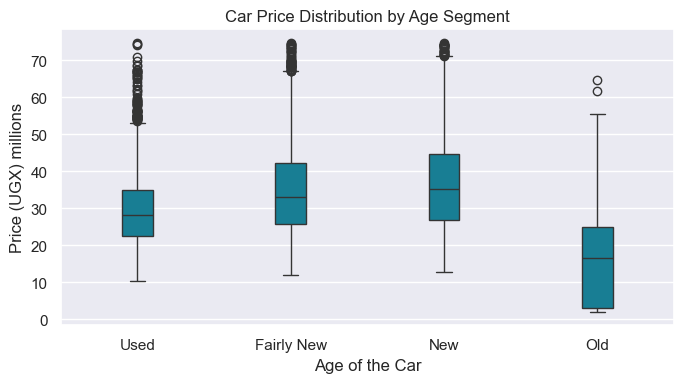

In [186]:
plt.figure(figsize=(7, 4))

sns.boxplot(
    data=df,
    x='age_segment',
    y=df['price'] / 1e6,
    color='#048BA8',
    width = 0.2
)

plt.title('Car Price Distribution by Age Segment')
plt.xlabel('Age of the Car')
plt.ylabel('Price (UGX) millions')
plt.tight_layout()
plt.show()

#### <span style="color: #D90368; font-family: 'Georgia', serif;">**ii. Horsepower vs. Price**</span>
- There is a positive correlation between horsepower and price. Higher horsepower vehicles are generally more expensive.

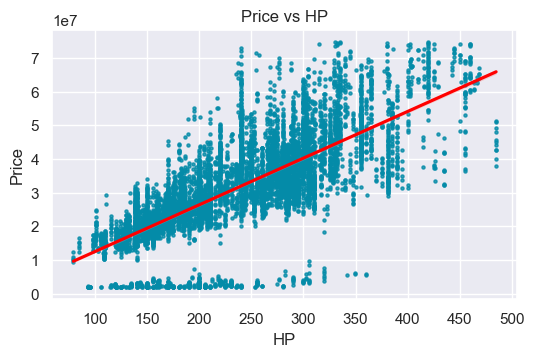

In [191]:
plt.figure(figsize=(6, 3.5))
sns.regplot(
    x='hp', 
    y='price', 
    data=df, 
    line_kws={'color': 'red'}, 
    scatter_kws={'color':'#048BA8', 's': 5}  # Adjust scatter point size if needed
)
plt.title('Price vs HP')
plt.xlabel('HP')
plt.ylabel('Price')
plt.show()

#### <span style="color: #D90368; font-family: 'Georgia', serif;">**ii. HP segement vs. Price**</span>

- Sports cars which have larger horsepower clearly shows how much expensive these cars are, while economy cars lies at the bottom of the rank showing how price of lower horsepower influence price

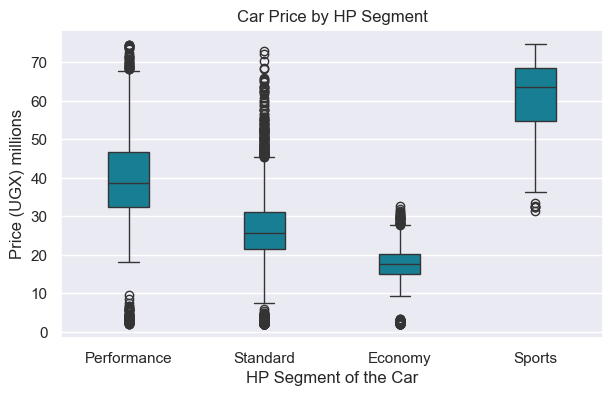

In [193]:
plt.figure(figsize=(7, 4))
sns.boxplot(
    x='hp_segment', 
    y=df['price'] / 1e6, 
    data=df,
    color='#048BA8',
    width = 0.3
)
plt.title('Car Price by HP Segment')
plt.xlabel('HP Segment of the Car')
plt.ylabel('Price (UGX) millions')
plt.show()

#### <span style="color: #D90368; font-family: 'Georgia', serif;">**iii. Fuel Efficiency vs. Price**</span>
- Efficient cars are generally the cheaper than other segments.
- On the other hand, gas guzzlers and average cars have a much wider price range, meaning you’ll find both affordable and high-end options. 

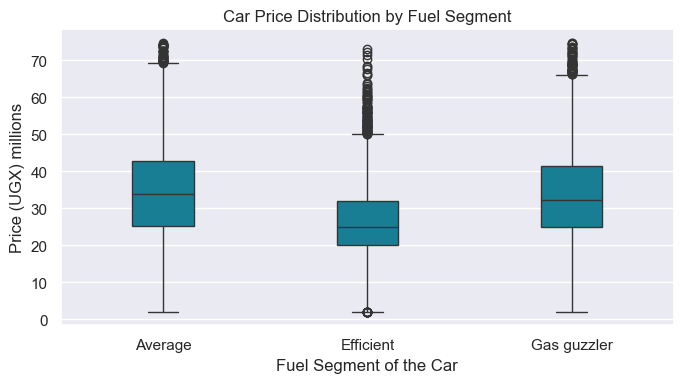

In [196]:
plt.figure(figsize=(7, 4))

sns.boxplot(
    data=df,
    x='fuel_segment',
    y=df['price'] / 1e6,
    color='#048BA8',
    width = 0.3
)

plt.title('Car Price Distribution by Fuel Segment')
plt.xlabel('Fuel Segment of the Car')
plt.ylabel('Price (UGX) millions')
plt.tight_layout()
plt.show()

#### <span style="color: #D90368; font-family: 'Georgia', serif;">**iv. Price vs Horsepower vs Fuel Segment**</span>
- **For car buyers:** There’s a positive trend between horsepower and price across all fuel segments. Buyers looking for fuel-efficient options (blue) will mostly find lower HP and lower-priced cars. However, "Gas guzzlers" (green) offer high HP at a wider price range, making them appealing to performance seekers but with higher fuel costs.

- **For car dealerships:** The "Average" segment (red) is spread widely across both HP and price ranges, capturing a broad consumer base. Noticeable overlap exists between the "Average" and "Gas guzzler" segments in the higher HP ranges, suggesting competition for high-performance buyers. Dealers should consider segmenting customers carefully, promoting efficiency for budget-conscious buyers and highlighting power and performance for premium clients.


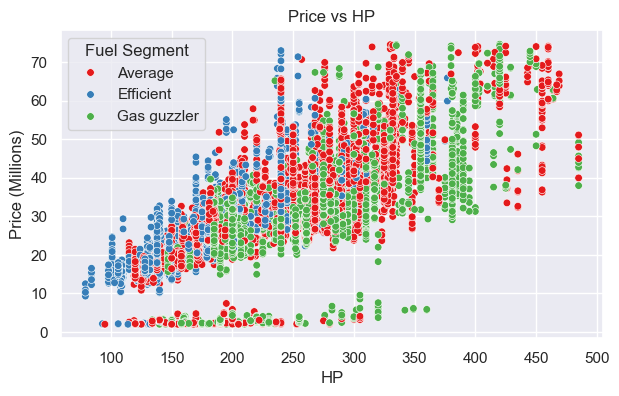

In [198]:
plt.figure(figsize=(7, 4))
sns.scatterplot(
    x='hp', 
    y= df['price']/1e6, 
    data=df, 
    hue='fuel_segment',  # Color by 'fuel_segment'
    palette='Set1',   # Use a color palette (optional)
    s= 30              # Adjust point size if needed
)
plt.title('Price vs HP')
plt.xlabel('HP')
plt.ylabel('Price (Millions)')
plt.legend(title='Fuel Segment')  # Add legend with a title
plt.show()

### <span style="color: #3498db; font-family: 'Georgia', serif;">**3. Fuel and Common Features**</span>

#### <span style="color: #D90368; font-family: 'Georgia', serif;">**i. Fuel and number of cylinders**</span>
One thing worth noting is how cars with more cylinders go fewer miles per gallon compared to a car with just 3 gas cylinders. While considering a car to buy, for economy class, a car with less cylinder is the best for you but you will be forgoing the power and performance qualities that come with high end products

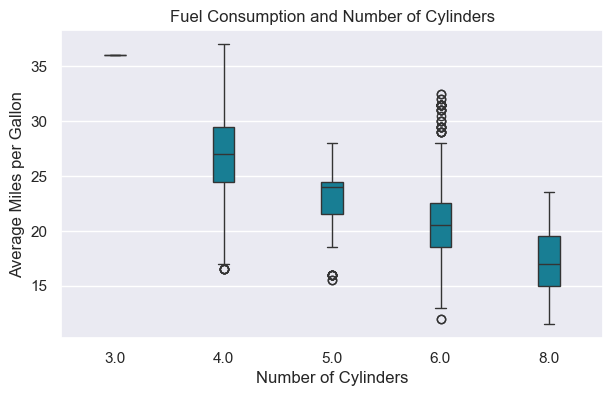

In [200]:
plt.figure(figsize=(7, 4))  # Set figure size to (10, 4)
sns.boxplot(
    x='cylinders', 
    y='mpg', 
    data=df, 
    width = 0.2,
    color='#048BA8'  # Use the specified color for all boxes
)
plt.title('Fuel Consumption and Number of Cylinders')
plt.xlabel('Number of Cylinders')
plt.ylabel('Average Miles per Gallon')
plt.show()

#### <span style="color: #D90368; font-family: 'Georgia', serif;">ii. Highway Fuel vs. City Fuel;</span>
- **For car buyers:** Highway mileage (blue) is consistently higher than city mileage (red), meaning cars are more fuel-efficient on highways. If most of your driving is in urban areas, expect lower MPG due to frequent stops and slower speeds.

- **For policymakers & sustainability advocates:** The gap between city and highway MPG suggests potential for improvement in urban fuel efficiency. Hybrid and electric vehicles could help bridge this gap by optimizing fuel consumption in stop-and-go traffic.

- **For car manufacturers:** The strong overlap between 15-25 MPG in both city and highway conditions highlights a key market segment. Vehicles with highway MPG exceeding 30+ MPG cater to fuel-conscious consumers, while those in the 10-15 MPG range may appeal to performance-driven buyers but come with higher fuel costs.

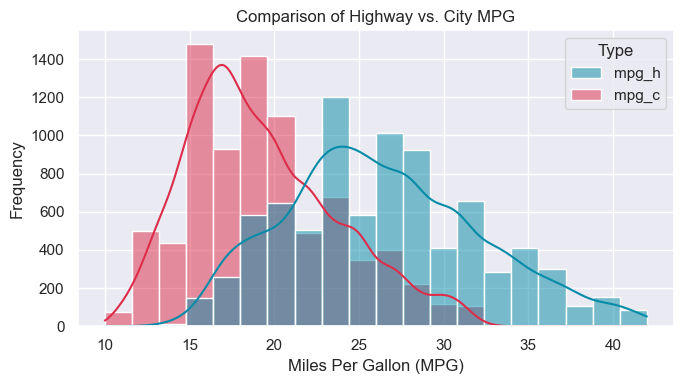

In [202]:
# Reshape the DataFrame to have 'mpg_h' and 'mpg_c' in a single column for comparison
df_melted = df[['mpg_h', 'mpg_c']].melt(var_name='Type', value_name='Miles Per Gallon (MPG)')

plt.figure(figsize=(7, 4))

sns.histplot(
    data=df_melted,
    x='Miles Per Gallon (MPG)',
    hue='Type',
    bins=20,
    kde=True,   # Optional: Set to True if you want a KDE curve
    palette=['#048BA8', '#DD2D4A']
)

plt.title("Comparison of Highway vs. City MPG")
plt.xlabel("Miles Per Gallon (MPG)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

#### <span style="color: #D90368; font-family: 'Georgia', serif;">iii. Horse power and Fuel</span>
Not only are cars with high horse power (HP) expensive but they are also very expensive in fuel, cars with lower horse power tends to go longer miles per gallon compared to cars with higher horse power. However there are a few cars with good horse power and some efficient fuel consumption. These cars include the Infiniti, Mercedes-Benz and the Acura

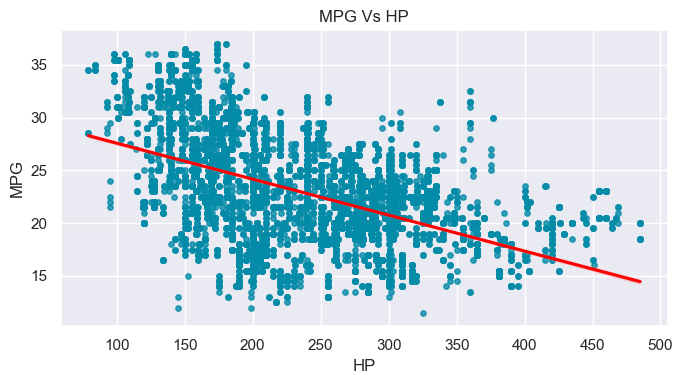

In [204]:
plt.figure(figsize=(7, 4))

# Create the scatter plot with a regression line (OLS)
sns.regplot(
    data=df,
    x='hp',
    y='mpg',
    scatter_kws={'color': '#048BA8','s': 15},  # Customize scatter points
    line_kws={'color': 'red'}     # Customize regression line color
)

plt.title('MPG Vs HP')
plt.xlabel('HP')
plt.ylabel('MPG')
plt.tight_layout()
plt.show()

## <span style="color: #3498db; font-family: 'Georgia', serif;">**Conclusion**</span>

Our exploratory data analysis (EDA) of car sales has uncovered several valuable insights:

- **Fuel Efficiency Trends:** A significant portion of cars fall into the "Average" fuel efficiency category (40.4%), with "Efficient" and "Gas Guzzlers" nearly evenly split. This highlights a balanced market between fuel-conscious buyers and performance seekers.
- **Price vs. Horsepower:** A clear positive trend exists—higher horsepower vehicles generally command higher prices. Fuel-efficient cars remain within a lower horsepower and price range, while high-performance cars cover a broader price spectrum.
- **City vs. Highway MPG:** Highway MPG is consistently higher, reinforcing that cars perform best on open roads. City driving significantly reduces efficiency, suggesting room for innovation in urban fuel optimization.
- **Market Positioning for Dealerships:** The overlap between the "Average" and "Gas Guzzler" segments in higher horsepower ranges suggests competition for high-performance buyers. Dealers should strategically market fuel efficiency to budget-conscious consumers while emphasizing power and premium features for performance-oriented customers.
